In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df1 = pd.read_csv('./ocRMA/exp.mRNA.AgilentG4502A_07_2.txt',sep = "\t", index_col=0,header = 0)
df2 = pd.read_csv('./ocRMA/exp.mRNA.HT_HG-U133A.txt',sep = "\t", index_col=0,header = 0)
df3 = pd.read_csv('./ocRMA/exp.mRNA.GSE6008.RMA.txt',sep = "\t", index_col=0,header = 0)
df4 = pd.read_csv('./ocRMA/exp.mRNA.GSE18520.RMA.txt',sep = "\t", index_col=0,header = 0)
df5 = pd.read_csv('./ocRMA/exp.mRNA.GSE40595.RMA.txt',sep = "\t", index_col=0,header = 0)
df6 = pd.read_csv('./ocRMA/mRNA.validation.txt',sep = "\t", index_col=0,header = 0)
df6 = df6.drop(df6.columns[range(8,16)],axis=1)

# blood sample
df8 = pd.read_csv('./ocRMA/blood/GSE11545.txt',sep = "\t", index_col=0,header = 0)
lab8 = np.genfromtxt('./oclabel/blood/GSE11545.label.txt',dtype="U16,U16,u1")['f2']
df9 = pd.read_csv('./ocRMA/blood/GSE31682.txt',sep = "\t", index_col=0,header = 0)
lab9 = np.genfromtxt('./oclabel/blood/GSE31682.label.txt',dtype="U16,U16,u1,u1")['f3']
df10 = pd.read_csv('./ocRMA/blood/GSE37582.txt',sep = "\t", index_col=0,header = 0)
lab10 = np.genfromtxt('./oclabel/blood/GSE37582.label.txt',dtype="U16,U16,u1")['f2']


comidx = df1.index.join(
    df2.index.join(
        df3.index.join(
            df4.index.join(
                df5.index.join(
#                     df6.index.join(ceRNA,how='inner'),how='inner')
                    df6.index,how='inner')
            ,how='inner')
        ,how='inner')
    ,how='inner')
,how='inner')


comidx = df8.index.join(df9.index.join(df10.index.join(comidx,how='inner'),how='inner'),how='inner')
# comidx = df8.index.join(comidx,how='inner')

df1 = df1.loc[comidx]
df2 = df2.loc[comidx]
df3 = df3.loc[comidx]
df4 = df4.loc[comidx]
df5 = df5.loc[comidx]
df6 = df6.loc[comidx]

lab1 = np.genfromtxt('./oclabel/AgilentG4502A_07_2.label.txt',dtype="U16,u1")['f1']
lab2 = np.genfromtxt('./oclabel/HT_HG-U133A.label.txt',dtype="U16,u1")['f1']
lab3 = np.genfromtxt('./oclabel/GSE6008.label.txt',dtype="U16,U16,u1")['f2']
lab4 = np.genfromtxt('./oclabel/GSE18520.label.txt',dtype="U16,U16,U16,u1,u1")['f4']
lab5 = np.genfromtxt('./oclabel/GSE40595.label.txt',dtype="U16,U16,U16,U16,U16,U16,U16,u1")['f7']
lab6 = np.genfromtxt('./oclabel/mRNA.label.txt',dtype="U16,u1")['f1']
# lab7 = np.genfromtxt('./oclabel/combat.label.txt',dtype="U16,u1")['f1']
lab6 = np.delete(lab6,range(8,16))

print(len(comidx))

8861


In [5]:
x_train = pd.concat([df2,df4,df6],axis=1)
y_train = np.concatenate((lab2,lab4,lab6))

# x_train = df7.to_numpy().T
# y_train = lab7

x_train1 = df2
y_train1 = lab2
x_train2 = df4
y_train2 = lab4

x_test1 = df3
x_test2 = df5
x_test3 = df1

y_test1 = lab3
y_test2 = lab5
y_test3 = lab1

In [6]:
RNAlst = pd.read_csv('./18bestpair.csv')
RNAlst

,clRNA,mRNA1,mRNA2,type,value_x,value_y,a,b,c,d,fdr
0,CFL1,TOP2A,SNCA,circ,0.5294,0.7921,0,24,626,8,1.980390e-33
1,COL1A2,MYO1E,TOP2A,circ,0.6508,0.6341,23,0,3,617,7.220300e-35
2,COL1A2,TOP2A,CRADD,circ,0.6341,0.7376,0,25,594,9,1.980390e-33
3,COL1A2,TOP2A,SNCA,circ,0.6341,0.8681,0,24,626,8,1.980390e-33
4,DDAH1,TRIB3,MEF2C,circ,0.6212,0.7662,0,26,466,36,7.447151e-25
5,DTL,PRC1,BBS4,circ,0.5249,0.9652,0,24,591,8,5.691479e-33
6,HDGF,TPX2,GNE,circ,0.6739,0.8484,1,23,622,7,1.161923e-31
7,HDGF,TPX2,PDGFD,circ,0.6739,0.6243,0,25,551,31,1.655681e-26
8,HUNK,PRC1,BBS4,circ,0.7414,0.7128,0,24,591,8,5.691479e-33
9,KRT7,TOP2A,MFAP4,circ,0.6263,0.5946,0,26,587,27,6.428753e-29


In [7]:
rna1 = RNAlst['mRNA1'][0]
rna2 = RNAlst['mRNA2'][0]
rna1

'TOP2A'

In [12]:
df

,TCGA.61.1910.01,TCGA.61.1728.01,TCGA.13.1819.02,TCGA.31.1953.01,TCGA.13.1819.01,TCGA.13.0764.01,TCGA.31.1951.01,TCGA.24.1552.01,TCGA.13.1477.01,TCGA.30.1862.01,...,X.A7..normalized.,X.A8..normalized.,X.C1..normalized.,X.C2..normalized.,X.C3..normalized.,X.C4..normalized.,X.C5..normalized.,X.C6..normalized.,X.C7..normalized.,X.C8..normalized.
A2M,8.5496,8.6459,10.3646,9.3107,8.7978,10.5943,8.9214,8.0622,7.8399,8.6863,...,13.5542,14.1735,14.0093,15.1365,13.6234,13.5755,14.1816,14.2338,15.5193,15.5568
A4GALT,4.1906,5.0201,4.2097,4.3131,4.0576,4.1522,4.2716,4.3631,4.4996,4.1208,...,7.5302,6.9934,7.9381,7.7555,7.8863,7.9180,8.5535,8.1820,7.6708,7.2272
AAAS,5.3644,4.7026,5.2621,4.8270,5.6163,4.9355,4.7178,4.4882,4.6270,4.8275,...,7.9738,8.0027,9.7270,7.4707,8.2009,8.1250,9.1009,8.9136,8.1659,8.1062
AACS,7.0139,6.6034,6.8982,6.6825,6.8310,6.5343,7.0140,7.2958,6.2976,6.7419,...,6.9688,7.2477,8.7715,8.0797,7.4470,7.3067,8.9382,8.7654,7.0426,6.8321
AADAC,6.6362,4.1466,4.2084,5.5654,4.3731,4.5044,5.0969,4.0317,3.8455,4.4198,...,2.4293,5.1225,9.7016,10.6951,5.2647,4.9564,7.0093,6.8134,9.2274,9.2294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWINT,7.9515,6.8183,9.1010,8.0476,9.4830,8.1850,7.4794,8.4075,8.4169,6.6517,...,3.4342,5.3656,8.6612,9.1369,8.2580,8.1578,8.6714,8.3879,8.2497,8.1391
ZXDC,6.0163,4.7032,5.5970,5.9541,5.7209,5.8955,4.9995,5.2116,4.7339,5.2370,...,12.7607,13.3884,13.0668,13.1026,12.9222,12.8644,13.1695,13.1397,13.4167,13.2828
ZYX,7.7679,6.8285,7.0932,7.4769,7.3300,7.2331,7.2771,7.7603,6.5872,6.7060,...,7.6981,8.3124,9.3096,6.7959,7.8441,7.6342,9.3980,9.1756,8.8130,8.6631
ZZEF1,4.6794,3.9214,4.3138,4.0199,4.0607,4.3868,4.3172,4.1593,4.1078,4.2928,...,5.5802,4.7407,4.6584,3.9747,5.6385,5.3578,4.3368,4.8872,4.4322,4.3915


In [24]:
df = x_train
lab = y_train
def prepareData(df,lab,rna1,rna2):
    df.loc[rna1][lab==0]
    df_1 = pd.DataFrame({'y':df.loc[rna1][lab==0].values,'x':np.ones((sum(lab==0),), dtype=int)})
    df_2 = pd.DataFrame({'y':df.loc[rna2][lab==0].values,'x':np.ones((sum(lab==0),), dtype=int)*2})
    df_3 = pd.DataFrame({'y':df.loc[rna1][lab==1].values,'x':np.ones((sum(lab==1),), dtype=int)*3})
    df_4 = pd.DataFrame({'y':df.loc[rna2][lab==1].values,'x':np.ones((sum(lab==1),), dtype=int)*4})
    df_plt = pd.concat([df_1,df_2,df_3,df_4],axis = 0)
    return df_plt

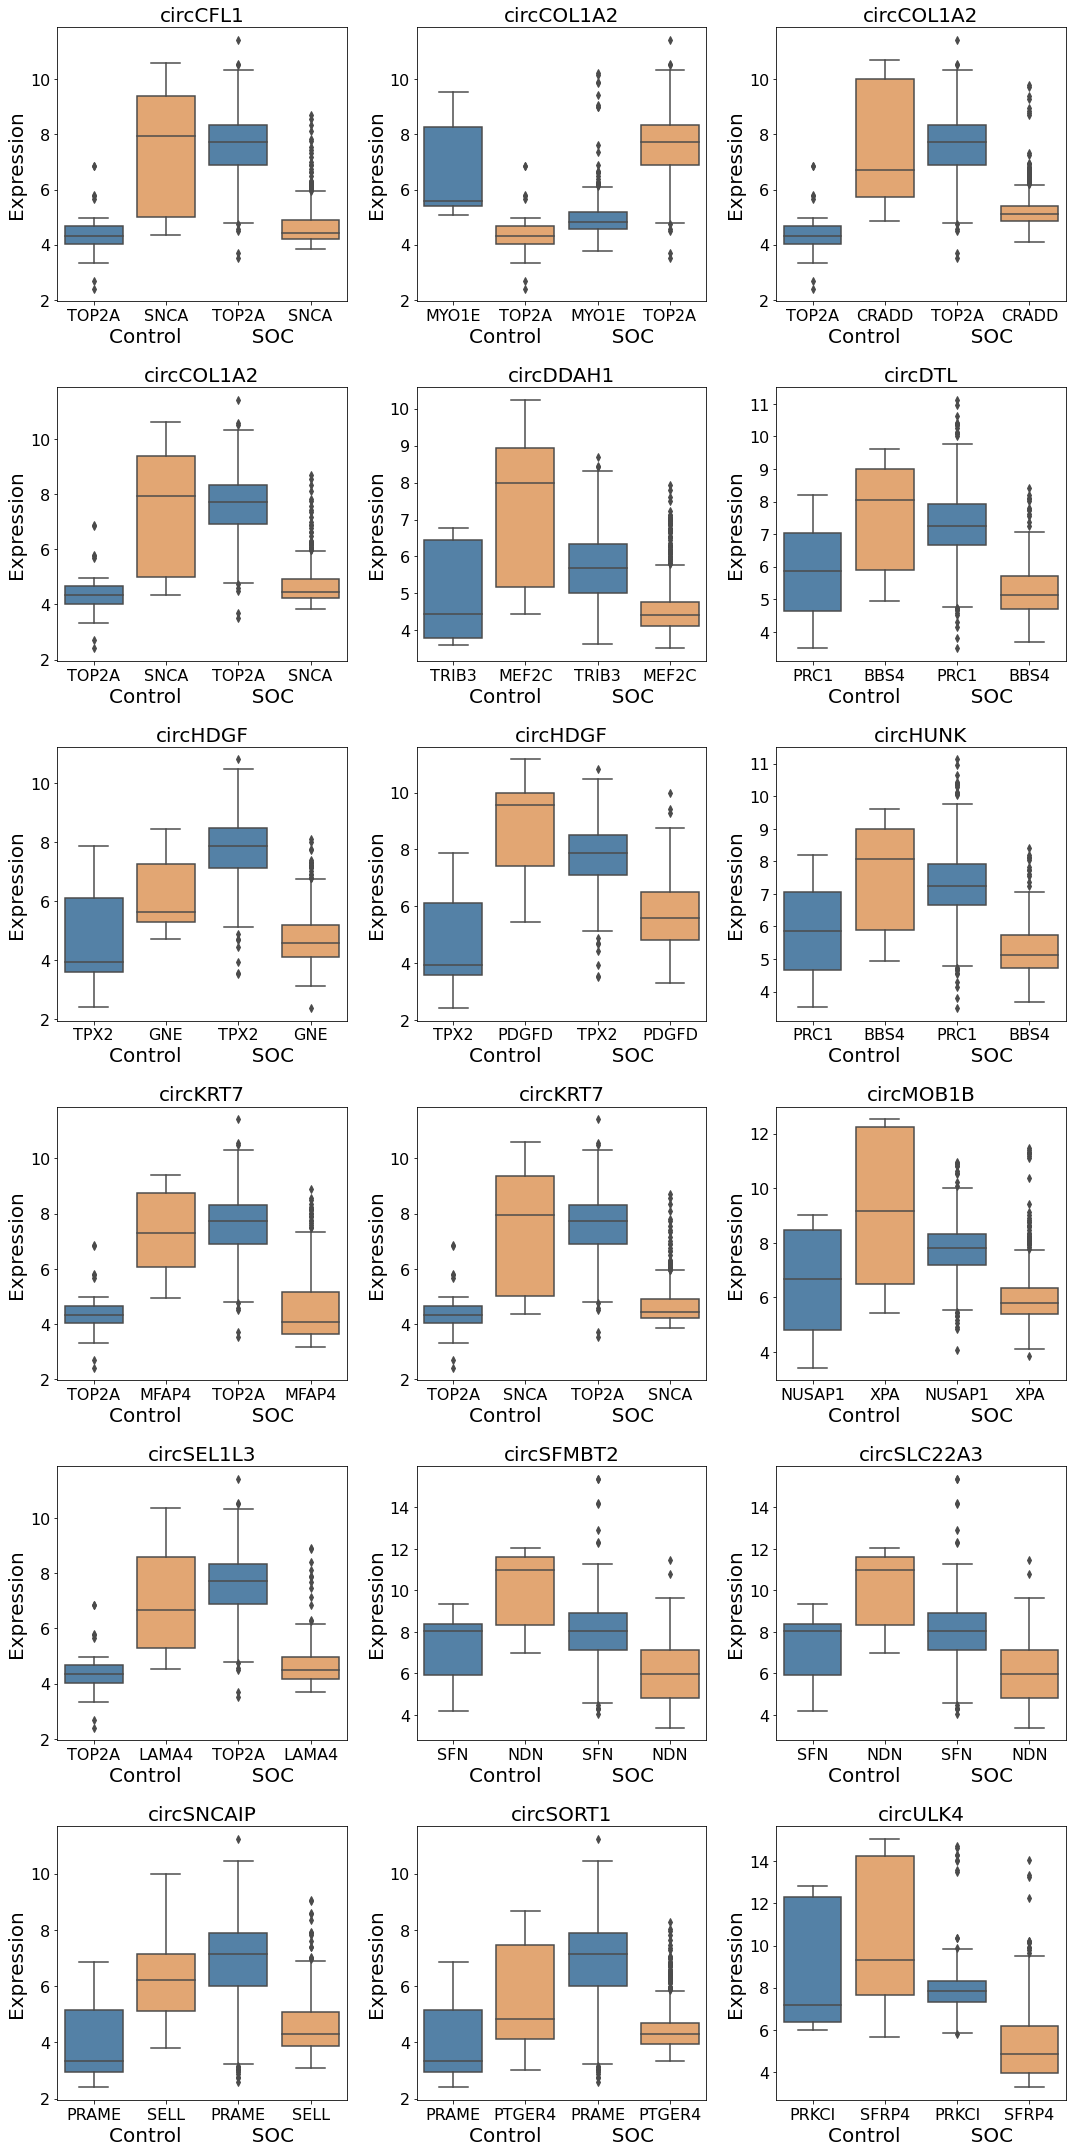

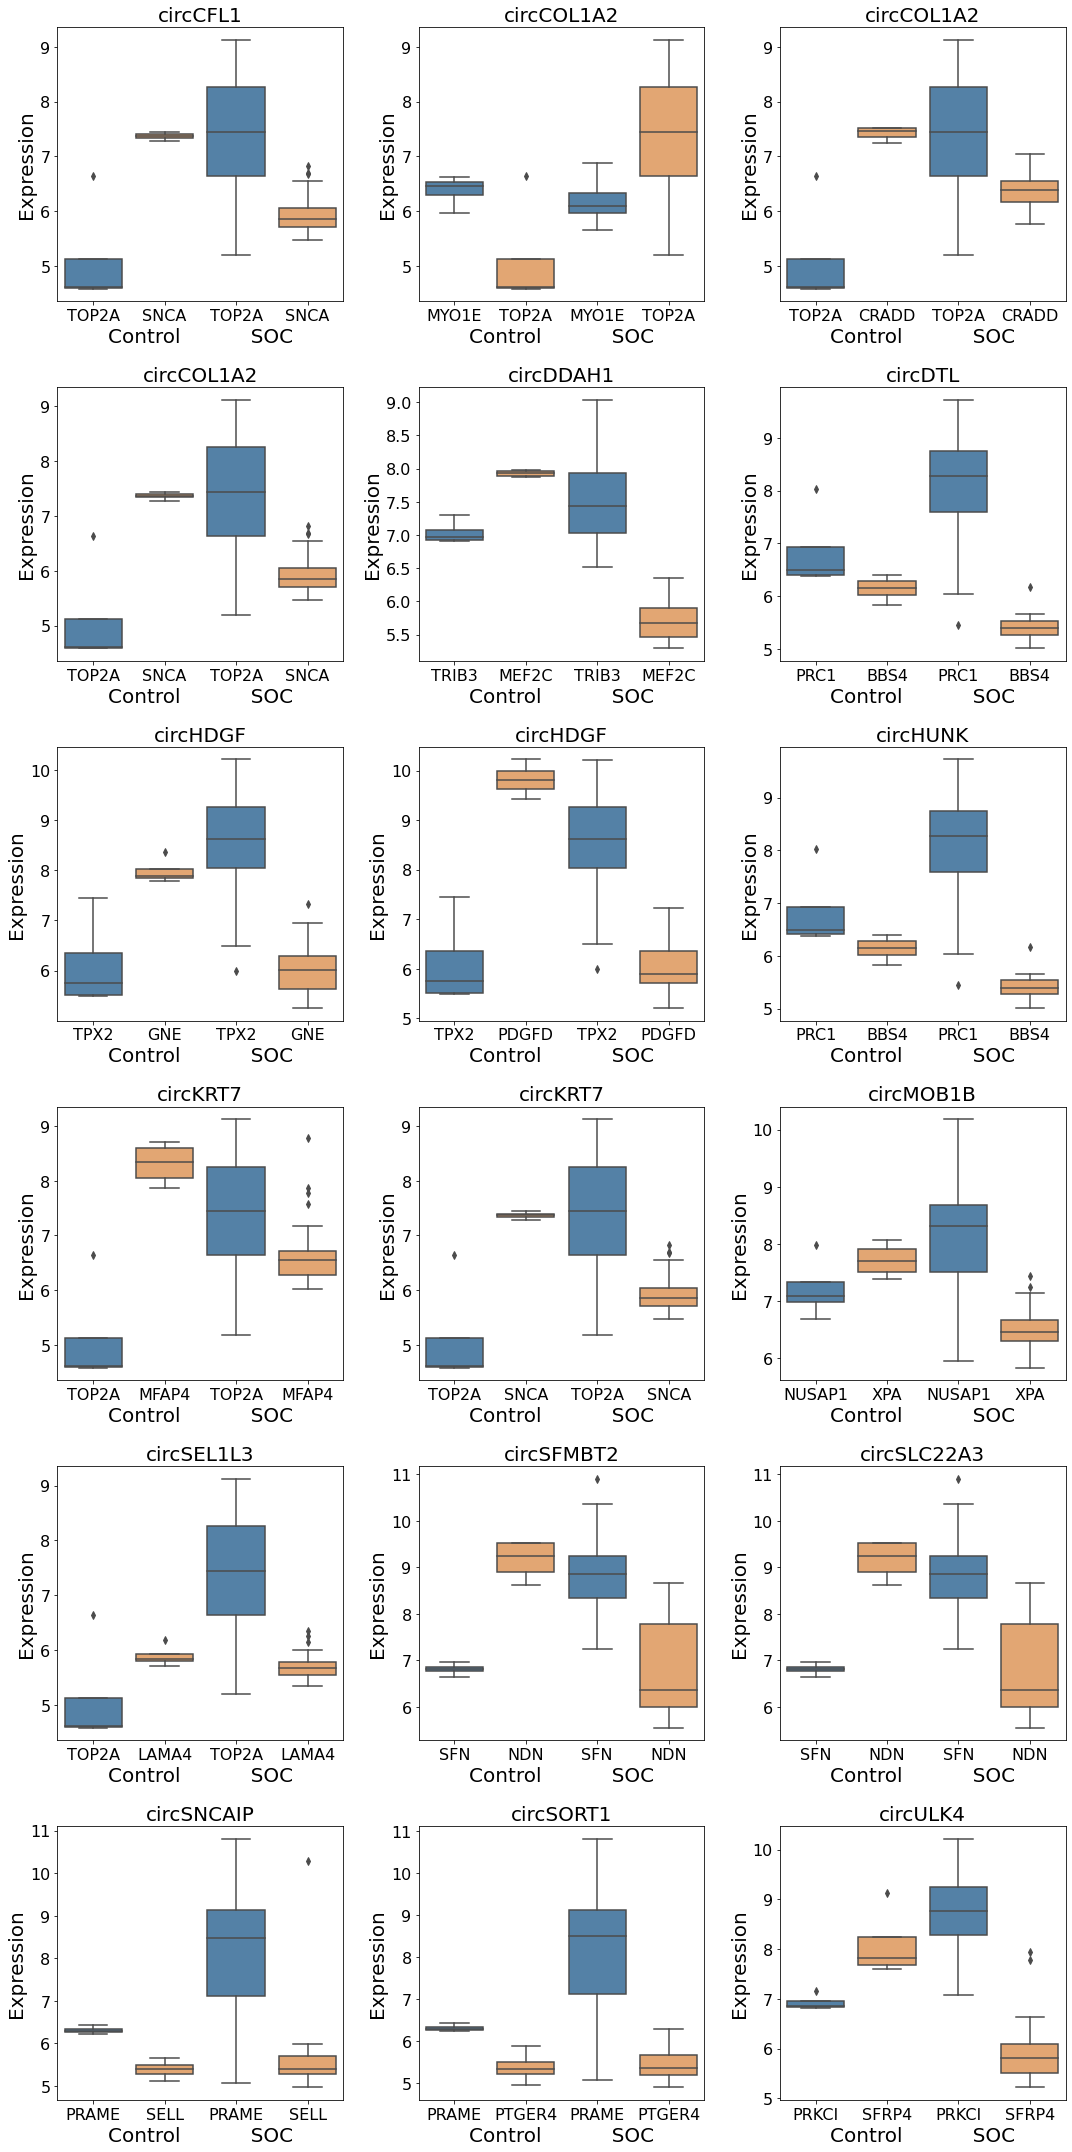

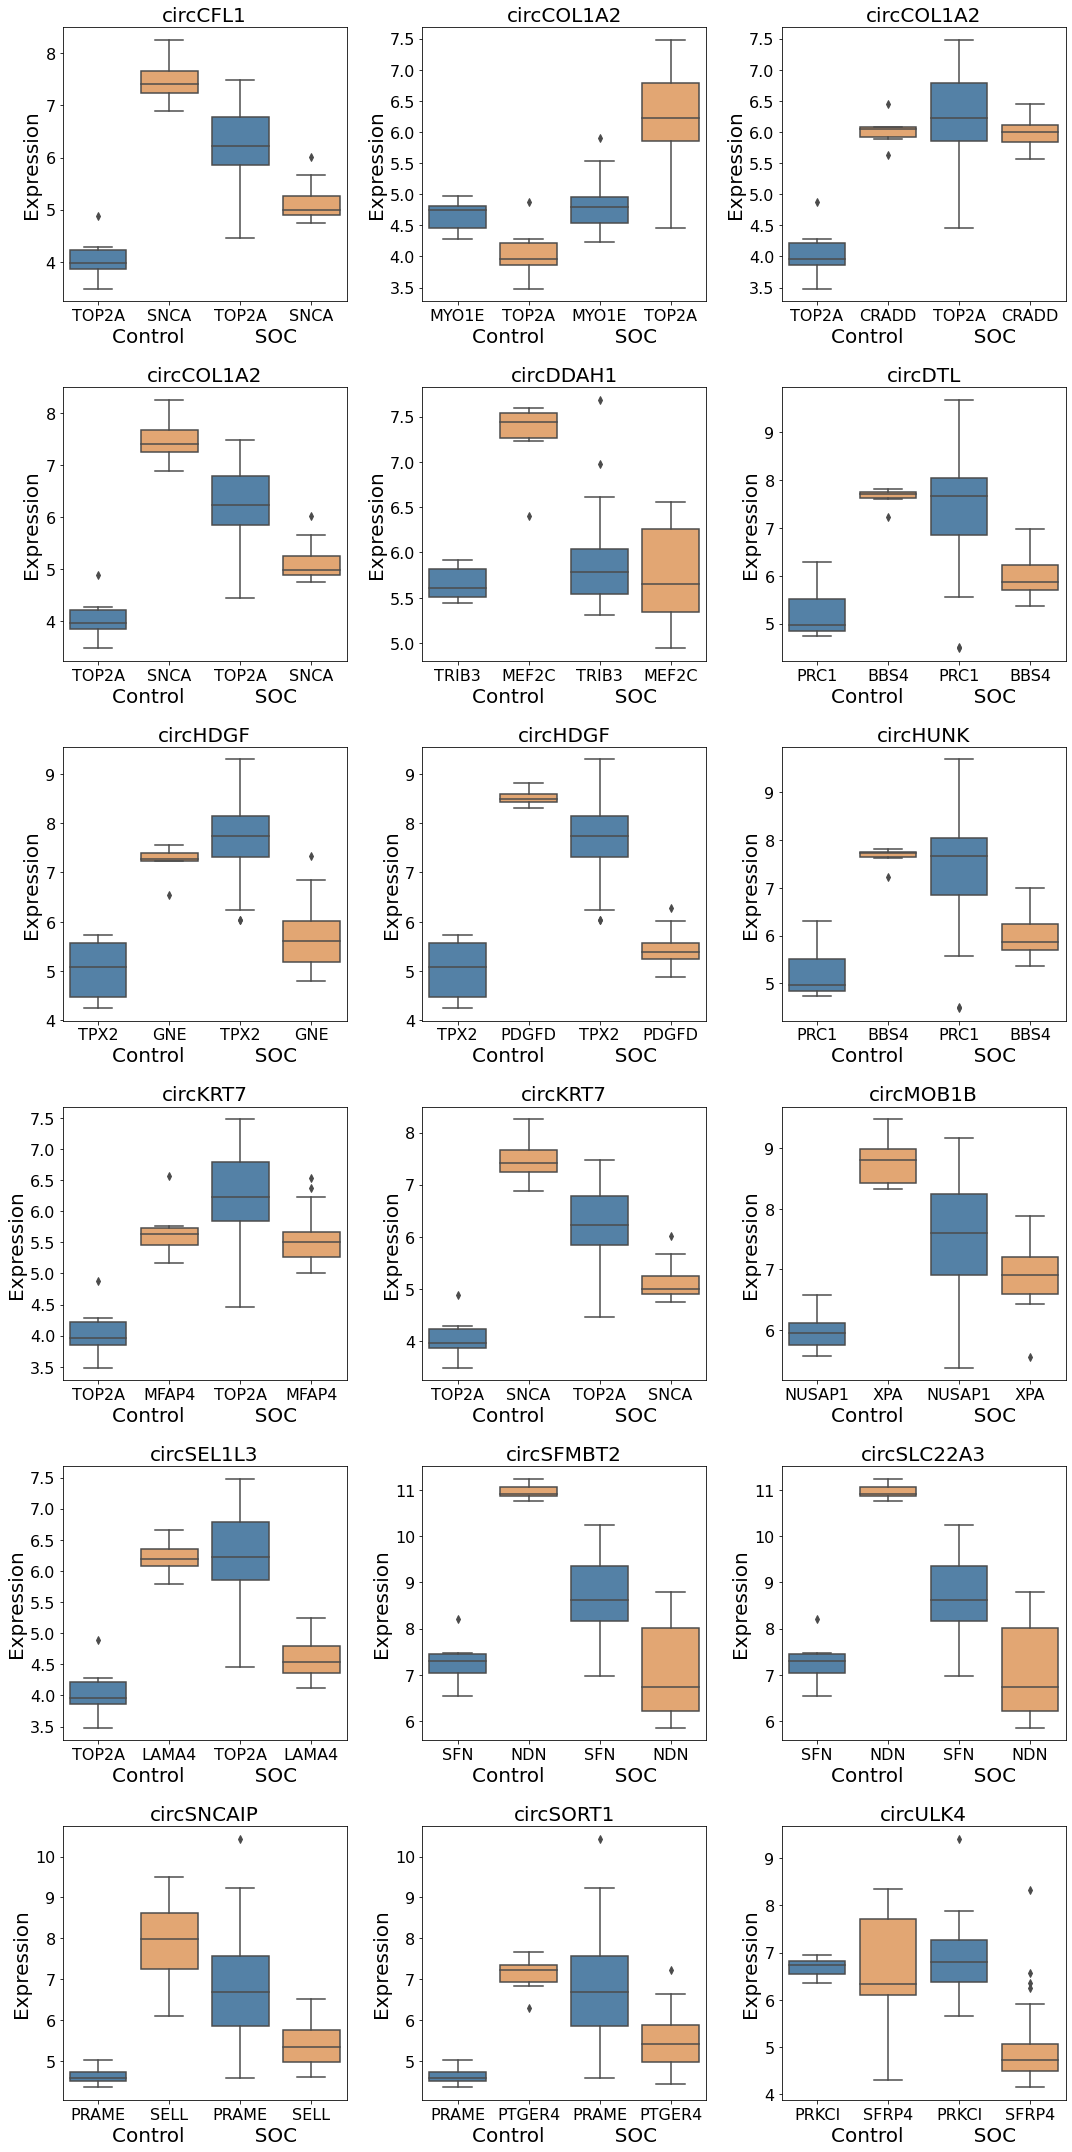

In [165]:
x_test = [x_train, x_test1,x_test2]
y_test = [y_train, y_test1,y_test2]
testname = ["train","test1GEO","test2GEO"]

my_pal = {1: "steelblue", 2: "sandybrown", 3:"steelblue", 4:"sandybrown"}

for x_,y_,ds in zip(x_test,y_test,testname):
    fig = plt.figure(figsize=(15,30))
    for i in range(18):

        ax = fig.add_subplot(6,3,i+1)

    #     plt.subplot(9,1,i+1)

        data = prepareData(x_,y_,RNAlst['mRNA1'][i],RNAlst['mRNA2'][i])

        sns.boxplot(x=data["x"], y=data["y"], palette=my_pal,ax=ax)
        plt.xticks([0, 1, 2, 3], [RNAlst['mRNA1'][i],RNAlst['mRNA2'][i],RNAlst['mRNA1'][i],RNAlst['mRNA2'][i]]
                  , fontsize=16)
        plt.yticks(fontsize=16)
        plt.ylabel('Expression', fontsize=20)
        plt.xlabel('Control           SOC', fontsize=20)
        plt.title('circ{}'.format(RNAlst['clRNA'][i]),fontsize=20)
        plt.tight_layout(w_pad = 2,h_pad = 2)

    fig.savefig('./pairplot/'+ds+'boxplot.png',dpi=50)
    plt.show()
    
#     fig = plt.figure(figsize=(5,45))
#     for i in range(9,18):

#         ax = fig.add_subplot(9,1,i-8)
#         data = prepareData(x_,y_,RNAlst['mRNA1'][i],RNAlst['mRNA2'][i])
#         sns.boxplot(x=data["x"], y=data["y"], palette=my_pal,ax=ax)
#         plt.xticks([0, 1, 2, 3], [RNAlst['mRNA1'][i],RNAlst['mRNA2'][i],RNAlst['mRNA1'][i],RNAlst['mRNA2'][i]]
#                   , fontsize=16)
#         plt.yticks(fontsize=16)
#         plt.ylabel('Expression', fontsize=20)
#         plt.xlabel('Control           SOC', fontsize=20)
#         plt.title('circ{}'.format(RNAlst['clRNA'][i]),fontsize=20)
#         plt.tight_layout(w_pad = 0,h_pad = 2)

#     fig.savefig('./pairplot/'+ds+'10-18boxplot.png',dpi=50)
#     plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

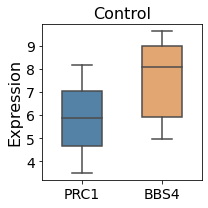

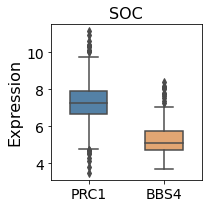

In [153]:
# heatmap
plt.figure(figsize = (3,3))
data = prepareData(x_train,y_train,'PRC1','BBS4')

sns.boxplot(x=data[data['x'].isin([1,2])]["x"], y=data[data['x'].isin([1,2])]["y"], palette=my_pal,width=0.5)
plt.xticks([0, 1], ['PRC1','BBS4']
            , fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Expression', fontsize=16)
plt.xlabel(None, fontsize=16)
plt.title('Control',fontsize=16)
plt.tight_layout()
plt.savefig('./pairplot/PRC1_BBS4_control.svg',dpi=50)
plt.show

plt.figure(figsize = (3,3))
data = prepareData(x_train,y_train,'PRC1','BBS4')

sns.boxplot(x=data[data['x'].isin([3,4])]["x"], y=data[data['x'].isin([3,4])]["y"], palette=my_pal,width=0.5)
plt.xticks([0, 1], ['PRC1','BBS4']
            , fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Expression', fontsize=16)
plt.xlabel(None, fontsize=16)
plt.title('SOC',fontsize=16)
plt.tight_layout()
plt.savefig('./pairplot/PRC1_BBS4_soc.svg',dpi=50)
plt.show

In [132]:
data[data['x'].isin([1,2])]

,y,x
0,7.2669,1
1,6.5335,1
2,8.2015,1
3,6.9686,1
4,7.4803,1
5,7.3366,1
0,10.8548,2
1,11.2435,2
2,11.1266,2
3,10.8991,2


In [134]:
data[data['x']==1]

,y,x
0,7.2669,1
1,6.5335,1
2,8.2015,1
3,6.9686,1
4,7.4803,1
5,7.3366,1
